In [1]:
import datetime
import numpy as np
from IPython.display import Image

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
import plotly

### Uploading tabular data to plotly, or creating a plotly `grid`

In [2]:
from plotly.grid_objs import Column, Grid

column_1 = Column([1, 2, 3], 'column 1')

column_2 = Column(['a', 'b', datetime.datetime.now()], 'column 2') # Tabular data can be numbers, strings, or dates

grid = Grid([column_1, column_2])

url = py.grid_ops.upload(grid, 
                         'grid example',      # name of the grid in your plotly account
                         world_readable=True, # public or private
                         auto_open=True)      # open the grid in the browser

In [3]:
print url # visit your newly created grid at this URL

https://plot.ly/~christopherp/1402/


View and share your grid at `url`

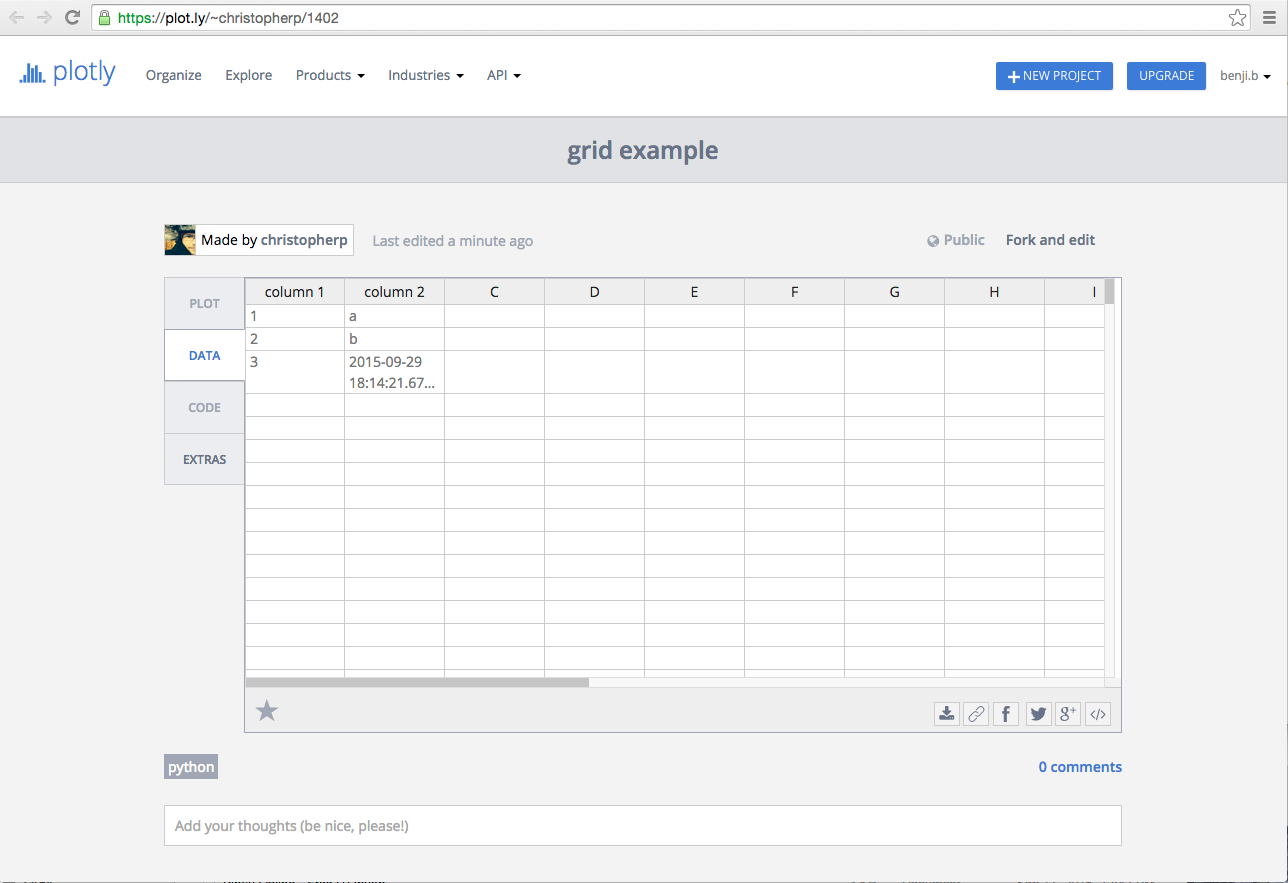

In [4]:
Image('http://i.imgur.com/O74b8YW.png')

##### The grid also appears in your list of files inside `Organize` 
##### and in your profile if the grid is public

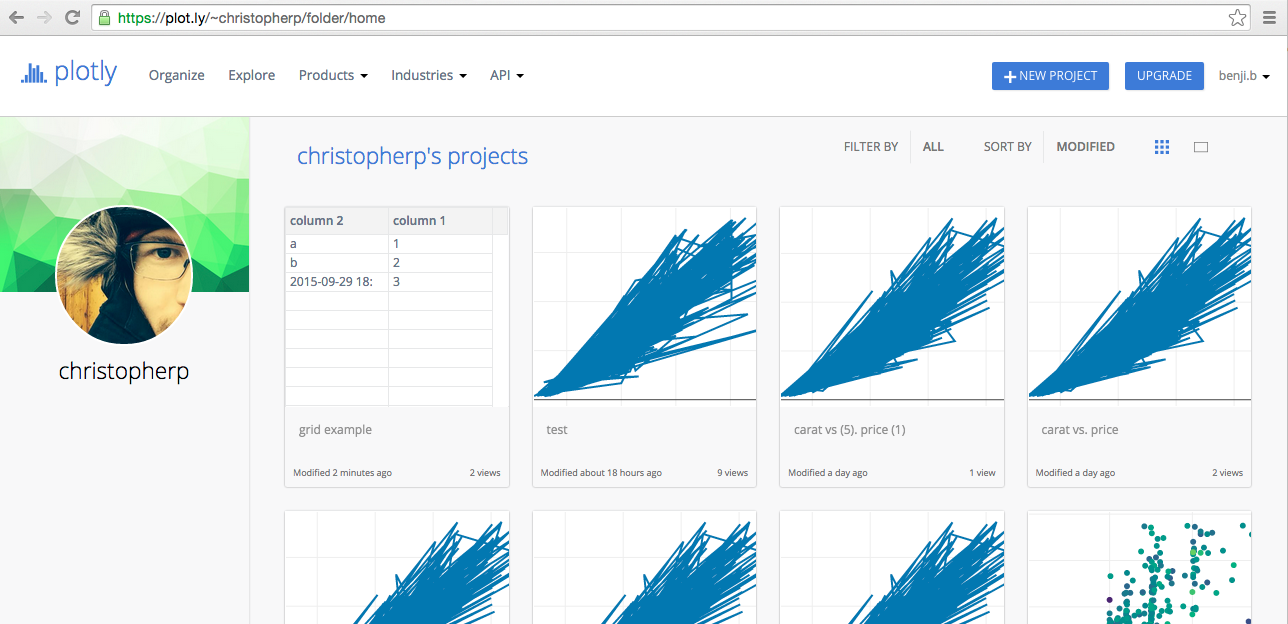

In [5]:
Image('http://i.imgur.com/KBBQOOW.png')

#### Uploading Dataframes to Plotly

In [ ]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
from datetime import datetime

import pandas.io.data as web

df = web.DataReader("aapl", 'yahoo', datetime(2007, 10, 1), datetime(2009, 4, 1))
df.head()

In [16]:
df.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

In [17]:
grid = Grid([Column(df[column_name], column_name) for column_name in df.columns])

url = py.grid_ops.upload(grid, 
                         'dataframe to plotly',    # name of the grid in your plotly account
                         world_readable=True,      # public or private
                         auto_open=True)           # open the grid in the browser

In [18]:
print url

https://plot.ly/~christopherp/1407/


![Dataframe to Plotly](http://i.imgur.com/lHeo5Ty.png)

## Making graphs from Grids

Plotly graphs are usually described with data embedded in them. For example, here we place `x` and `y` data directly into our `Histogram2dContour` object:

In [6]:
x = np.random.randn(1000)
y = np.random.randn(1000)+1

data = Data([
    Histogram2dContour(
        x=x,
        y=y
    )
])

py.iplot(data, filename='Example 2D Histogram Contour')

We can also create graphs based off of references to columns of grids. 

Here, we'll upload several `column`s to our Plotly account:

In [7]:
column_1 = Column(np.random.randn(1000), 'column 1')
column_2 = Column(np.random.randn(1000)+1, 'column 2')
column_3 = Column(np.random.randn(1000)+2, 'column 3')
column_4 = Column(np.random.randn(1000)+3, 'column 4')

grid = Grid([column_1, column_2, column_3, column_4])

py.grid_ops.upload(grid, 'randn with integer offsets')

u'https://plot.ly/~christopherp/1405/'

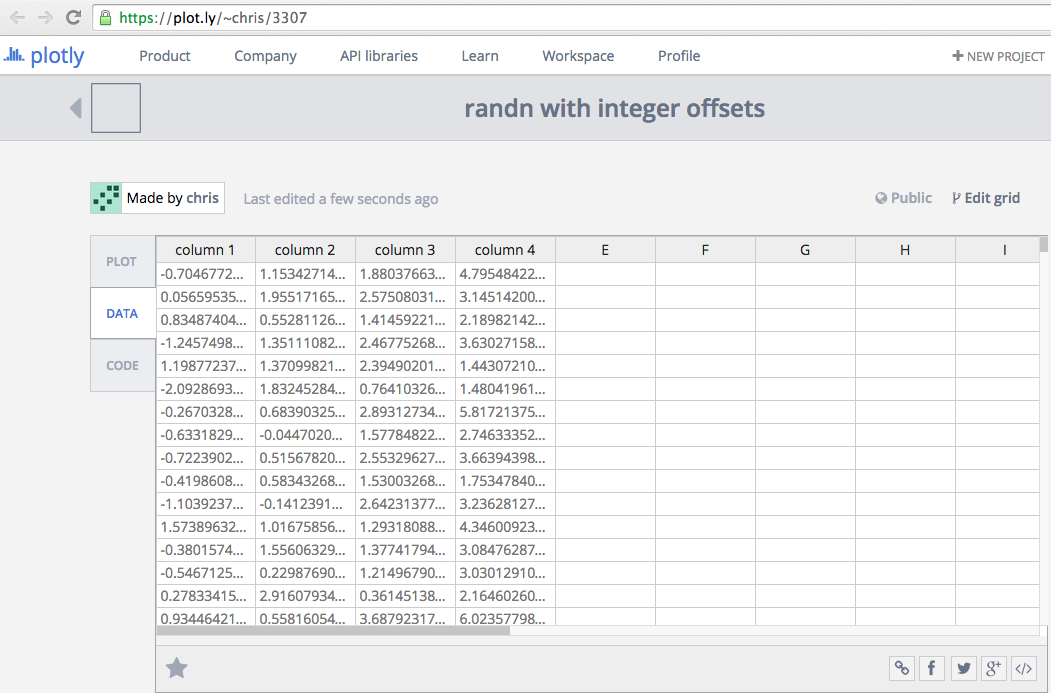

In [8]:
Image('http://i.imgur.com/LWCGn8q.png')

Now, instead of placing data into `x` and `y`, we'll place our Grid columns into `xsrc` and `ysrc`:

In [9]:
data = Data([
    Histogram2dContour(
        xsrc=grid[0],
        ysrc=grid[1]
    )
])

py.iplot(data, filename='2D Contour from Grid Data')

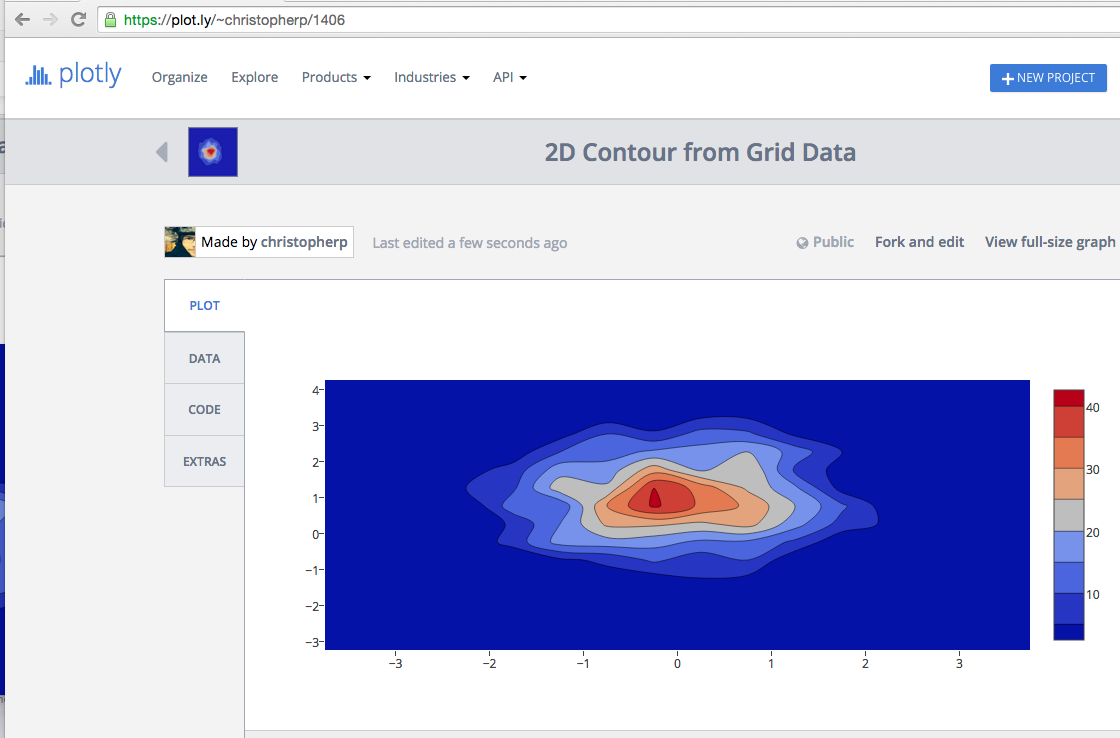

In [10]:
Image('http://i.imgur.com/iYFlVyV.png')

So, when you view the data, you'll see your original grid, not just the columns that compose this graph

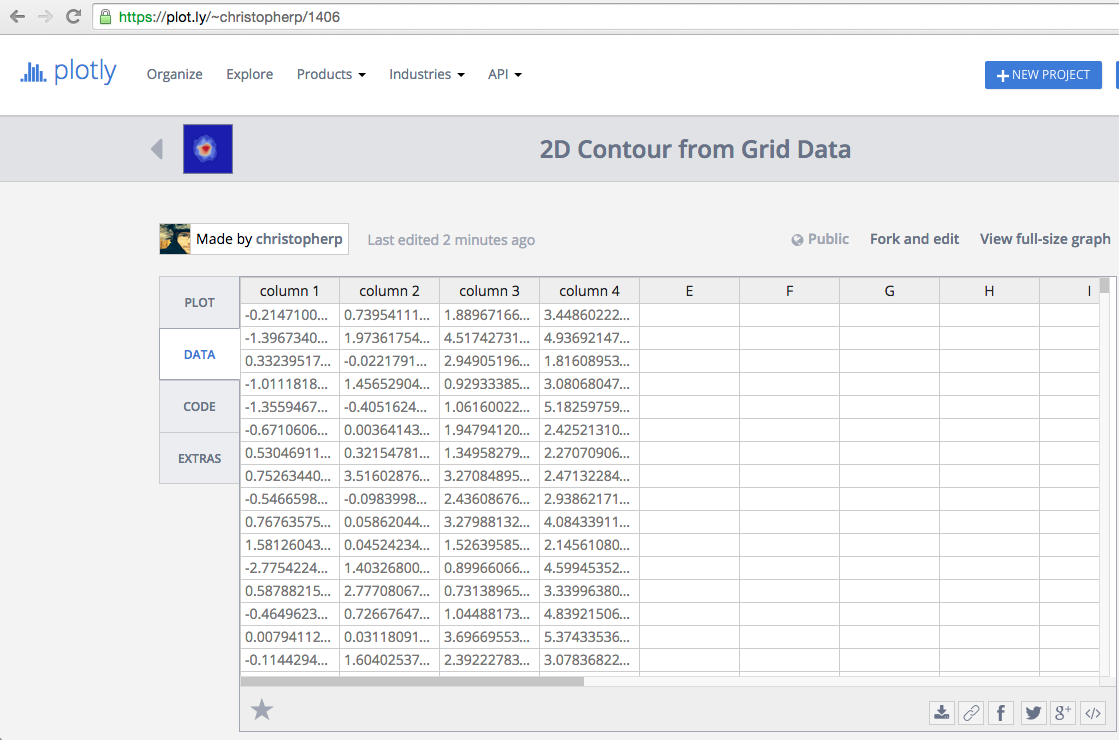

In [11]:
Image('http://i.imgur.com/NNLCusq.png')

This means that you can keep all of your raw data in one place, under one grid.

If you update the original data source, in the workspace or with our API, all of the graphs that are sourced from it will be updated as well.

You can make multiple graphs from a single Grid and you can make a graph from multiple grids.

You can add rows and columns to existing grids programatically. To learn more, call help on our `grid_ops`:

In [12]:
help(py.grid_ops)

Help on class grid_ops in module plotly.plotly.plotly:

class grid_ops
 |  Interface to Plotly's Grid API.
 |  Plotly Grids are Plotly's tabular data object, rendered
 |  in an online spreadsheet. Plotly graphs can be made from
 |  references of columns of Plotly grid objects. Free-form
 |  JSON Metadata can be saved with Plotly grids.
 |  
 |  To create a Plotly grid in your Plotly account from Python,
 |  see `grid_ops.upload`.
 |  
 |  To add rows or columns to an existing Plotly grid, see
 |  `grid_ops.append_rows` and `grid_ops.append_columns`
 |  respectively.
 |  
 |  To delete one of your grid objects, see `grid_ops.delete`.
 |  
 |  Class methods defined here:
 |  
 |  append_columns(cls, columns, grid=None, grid_url=None) from __builtin__.classobj
 |      Append columns to a Plotly grid.
 |      
 |      `columns` is an iterable of plotly.grid_objs.Column objects
 |      and only one of `grid` and `grid_url` needs to specified.
 |      
 |      `grid` is a ploty.grid_objs.Gri

## Attaching meta data to grids

In [Plotly Enterprise](https://plot.ly/product/enterprise/), you can upload and assign free-form JSON `metadata` to any grid object.

In [22]:
meta = {
    "Month": "November",
    "Experiment ID": "d3kbd",
    "Operator": "James Murphy",
    "Initial Conditions": {
          "Voltage": 5.5
    }
}

In [26]:
grid_url = py.grid_ops.upload(grid, 
                              'grid with meta data', 
                              meta=meta)

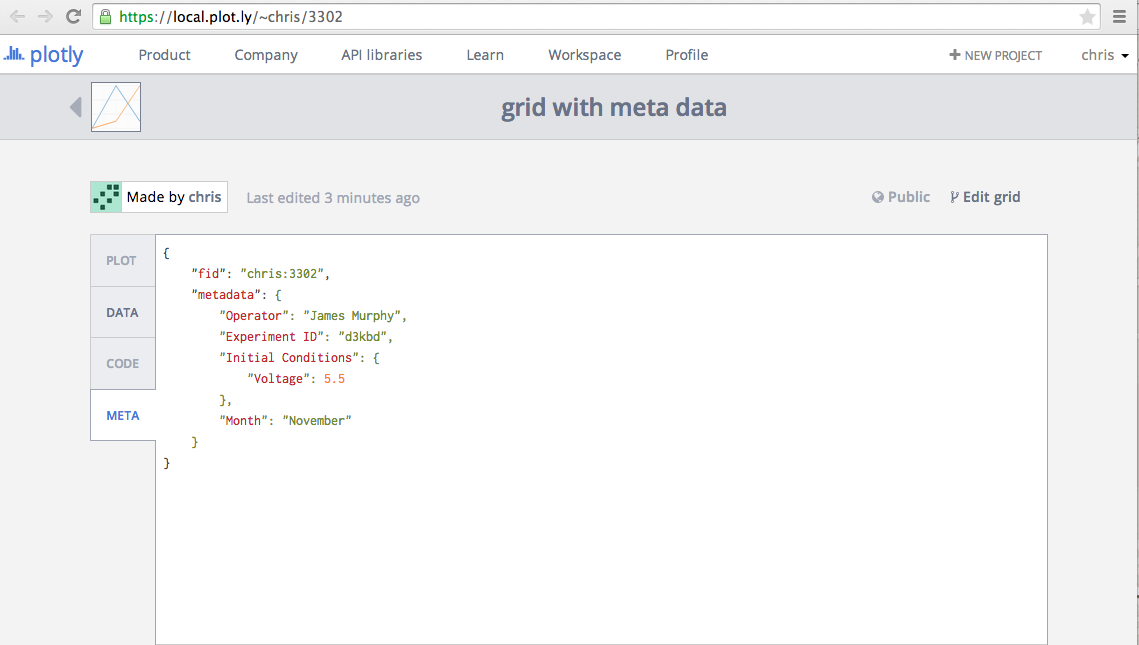

In [27]:
Image('http://i.imgur.com/lvJcavh.png')

In [22]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install publisher --upgrade
import publisher
publisher.publish(
    'grid-api.ipynb', '/python/data-api', 'Upload Data to Plotly from Python', 
    'How to upload data to Plotly from Python with the Plotly Grid API.',
    title='Plotly Data API', language='python',
    page_type='example_index', has_thumbnail='true', display_as='file_settings')

You are using pip version 7.1.0, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: publisher in /Users/chriddyp/Repos/venvpy27/lib/python2.7/site-packages
